# 1. start a CAS session & connect to CAS

### 1.1 Import the SWAT package

The SAS SWAT package is a Python interface to SAS Cloud Analytic Services (CAS) (the centerpiece of the SAS Viya framework). 
With the SWAT package, you can load and analyze data sets of any size on your desktop or in the cloud. 
Since CAS can be used on a local desktop or in a hosted cloud environment, you can analyze extremely large data sets 
using as much processing power as you need, while still retaining the ease-of-use of Python on the client side.

Using SWAT, you can execute workflows of CAS analytic actions, then pull down the summarized data to further 
process on the client side in Python, or to merge with data from other sources using familiar Pandas data structures. 
In fact, the SWAT package mimics much of the API of the Pandas package so that using CAS should feel familiar to 
current Pandas users.

With SAS analytics in the cloud and the use of Python and its large collection of open source packages, 
the SWAT package gives you access to the best of both worlds.

##### Before you can use the SWAT package, you will need a running CAS server. 

To connect to a CAS server, you simply import SWAT and use the swat.CAS class to create a connection. 
The form we will use for this HOW is the most basic form - to pass the hostname, port, userid, and password.

In [626]:
#import swat

### 1.2 create a CAS connection

We are already connected to a running CAS server. Describing  installation and startup of CAS is beyond the scope of this HOW.
The following pieces of information are required to connect to CAS from SWAT: 
1) host name, 2) port number, 3) user name, and 4) password. 
The host name is the name of the server that CAS is running on.The port number is the port that SWAT connects to. 
Finally, a user name and password are required to authenticate to the server

In [627]:
#conn=swat.CAS('server.demo.sas.com',8777,username='student',password='Metadata0')

### 1.3 Run CAS Actions

CAS actions perform a single task. CAS actions are aggregated with other actions in an action set and 
sually contain actions that are based on common functionality.
Use the help action to ask CAS directly what actions are available

In [618]:
#conn.help()

Run a simple action like serverstatus to verify that the connection is working.

In [611]:
#conn.serverstatus()

There is one caslib that is considered to be active at any time. An active caslib means that any table references 
not accompanied by a caslib name are assumed to be the active caslib. 
Use the caslibinfo action to see which caslib is active. Notice, that he Casuser caslib is marked as the active caslib.

In [612]:
#conn.caslibinfo()

### 1.4	Load dataset from the client side

The simplest way to load data is to do it from the client side by using data loading methods on the cas object that 
parallel data reading operations in the pandas module. 
Note: Loading data from the client-side will be slower than loading data files from the server. 
      Client-side data loading is intended for smaller data sets.

The CAS.read_csv() method works just like the pandas.read_csv() function. In fact, CAS.read_csv() uses 
pandas.read_csv() in the background. When pandas.read_csv() finishes parsing the CSV file into a pandas.DataFrame, 
it gets uploaded to a CAS table by CAS.read_csv(). The returned object is a CASTable object.
The only difference is that the result of the method is a CASTable object rather than a pandas DataFrame

In the following scenario, we are pointing to a URL that references CSV data. We could just as easily point to a local file. 
Bear in mind that when using a URL, the data is downloaded from wherever it is to the client machine for parsing 
before it is uploaded to CAS.

In [632]:
#cars = conn.read_csv('https://raw.githubusercontent.com/CharuSAS/pythondata/master/cars.csv')

NOTE: Cloud Analytic Services made the uploaded file available as table TMPWL1KTNKT in caslib CASUSER(student).
NOTE: The table TMPWL1KTNKT has been created in caslib CASUSER(student) from binary data uploaded to Cloud Analytic Services.


We should now have the cars table in our CAS session

If you don’t want the difficult-to-read generated name for a table, you can specify one using the casout= parameter.

In [543]:
#cars = conn.read_csv('https://raw.githubusercontent.com/CharuSAS/pythondata/master/cars.csv',casout='cars')

We can get a fair bit of information about our data using CAS actions for simple statistics. 
These actions are in an action set called simple. The simple action set should already be loaded. 
Verify this by running the actionsetinfo action (in addition to running
the action, we are also accessing the ‘actionset’ column of the DataFrame in the ‘setinfo’ key of the result
in the code below).

In [631]:
#conn.actionsetinfo().setinfo.actionset

The IPython environment has a way of invoking help as well. It is more useful in the notebook environment where the help 
content will pop up in a separate pane of the browser. To bring up help for an action set, you simply add a ? after the action 
set attribute name.
Using IPython’s ? operator for displaying help, display the following on the simple attribute of the connection object.

In [622]:
#conn.simple?

The CAS server has a builtin help system that will tell you about action sets and actions. 
Specify the action set name as a parameter if you only want to see the help for a single action set.

In [625]:
#conn.help(actionset='simple')

As mentioned earlier, these methods on the CAS object use the Pandas functions under-the-covers to do the parsing. This means that you can also use all of the Pandas parsing options.
Once verified that this action set loaded, use the summary action on our previously loaded CARS table.

In [540]:
#cars.summary()

### 1.5 Load CAS Action Sets

While CAS comes with a few pre-loaded action sets, you will likely want to load action sets with other capabilities 
such as percentiles, Data step, SQL, or even machine learning. The action used to load action sets is called loadactionset.

In [536]:
#conn.loadactionset('percentile')

Now use the percentile action set on cars data

In [535]:
#cars.percentile()

## 2. Use CASTable objects like a DataFrame

The CASTable object is the most important object in the SWAT package besides the CAS connection object.
It keeps your CAS table settings in one object. Also it enables you to directly call CAS actions on the table object
rather than always having to supply them as a parameter to the action.
CASTable objects do not contain actual data. They are simply a client-side view of the data in a CAS table on a CAS server.

CASTable objects can be used in multiple ways. They can be used as simply a container of table parameters 
and used as CAS action parameter values. If a connection is associated with it (either by instantiating it from CAS.CASTable() 
or using set_connection()), it can be used to call CAS actions on the table. 
Finally, it supports much of the pandas.DataFrame API, so it can interact with CAS tables in much the same way you 
interact with local data.

As mentioned earlier, CASTable objects implement many of the pandas.DataFrame methods and properties. 
this means that you can use the familiar Pandas.DataFrame API, but use it on data that is far too large for 
pandas to handle. a few examples

The first step to take before working with CASTable objects is to create a data table in CAS. 

### 2.1 Load the Iris data into a DataFrame

Since Dataframes are not built into Python, we must first import their definition from the Pandas module

In [636]:
#import pandas as pd

Load data from iris.csv into a pandas dataframe using the read_csv method in pandas

In [634]:
#df = pd.read_csv('/workshop/HOW/Shankar_5331/data/iris.csv')

Use the columns method for listing names of all of the columns used

In [635]:
#df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

### 2.2 Load iris.csv into a CAS table

In [544]:
#conn.droptable('iris', caslib='casuser')

Load the CASTable IRIS in this ession and create a CASTable object that points to it.
Use the CASTable method of the CAS connection object and pass the name of the table. 
You will now have a CASTable object to interact with

In [637]:
#tbl=conn.loadtable('iris.csv', caslib='casuser').casTable

NOTE: Cloud Analytic Services made the file iris.csv available as table IRIS in caslib CASUSER(student).


Use the tableinfo action to confirm that the table exists IRIS exists

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TMP29NQPHN5,428,15,0,utf-8,2020-02-08T22:25:34-05:00,2020-02-08T22:25:34-05:00,2020-02-08T22:25:34-05:00,UTF8,1.896838e+09,...,0,0,0,,,0,student,,2020-02-08T22:25:34-05:00,1.896838e+09
1,CARS,428,15,0,utf-8,2020-02-08T22:25:50-05:00,2020-02-08T22:25:50-05:00,2020-02-08T22:25:50-05:00,UTF8,1.896838e+09,...,0,0,0,,,0,student,,2020-02-08T22:25:50-05:00,1.896838e+09
2,TMPWL1KTNKT,428,15,0,utf-8,2020-02-08T22:29:21-05:00,2020-02-08T22:29:21-05:00,2020-02-08T22:29:21-05:00,UTF8,1.896838e+09,...,0,0,0,,,0,student,,2020-02-08T22:29:21-05:00,1.896838e+09
3,IRIS,150,5,0,utf-8,2020-02-08T22:34:59-05:00,2020-02-08T22:34:59-05:00,2020-02-08T22:34:59-05:00,UTF8,1.896838e+09,...,0,0,0,iris.csv,CASUSER(student),0,student,,2020-02-07T11:08:36-05:00,1.896711e+09
4,MYCUSTOMERS,951669,24,0,utf-8,2020-01-31T16:54:19-05:00,2020-01-31T16:54:24-05:00,2020-01-31T17:00:46-05:00,UTF8,1.896127e+09,...,0,0,0,,,0,student,,,NaN


In [549]:
#conn.table.tableInfo()

The head() method picks up the first 5 records by default. The head and tail methods accept the n parameter indicating number of records to retrieve(default is 5). Modify the value of n to return 4 records.

In [ ]:
#tbl.head(n=4)

CAS commmonly deals with large datasets and you might not want to bring all of the variables back. 
Using the columns parameter, subset the columns that are retrieved

In [ ]:
#tbl.tail(columns=['sepallength', 'petallength'])

### 2.3 Compare dataframe with CASTable

#### Find data types using dtypes

In [639]:
#df.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
dtype: object

In [640]:
#tbl.dtypes

SepalLength     double
SepalWidth      double
PetalLength     double
PetalWidth      double
Name           varchar
dtype: object

Notice a small difference. The data types supported by DataFrames and those supported by CAS tables have different names. 
The different names don't matter since the Python float64 types is equivalent to the CAS double type. 

# 3. Explore data and gather summary statistics

### 3.1 Data exploration

Histograms help to view the distribution of numeric variables within a dataset. They can be used to identify any issues or outliers in the data. To create a histogram of all numeric variables within the CAS table, ues the Python hist method. 

This hist method produces one histogram for each numeric variable within the data set. The figsize option included within the code specifies the size of the plot which you would like to be created. For the iris table, one histogram is created for the distribution of PetalLength, PetalWidth, SepalLength, SepalWidth. Output displays 4 plots  generated for the IRIS CASTable:

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cd0877090>


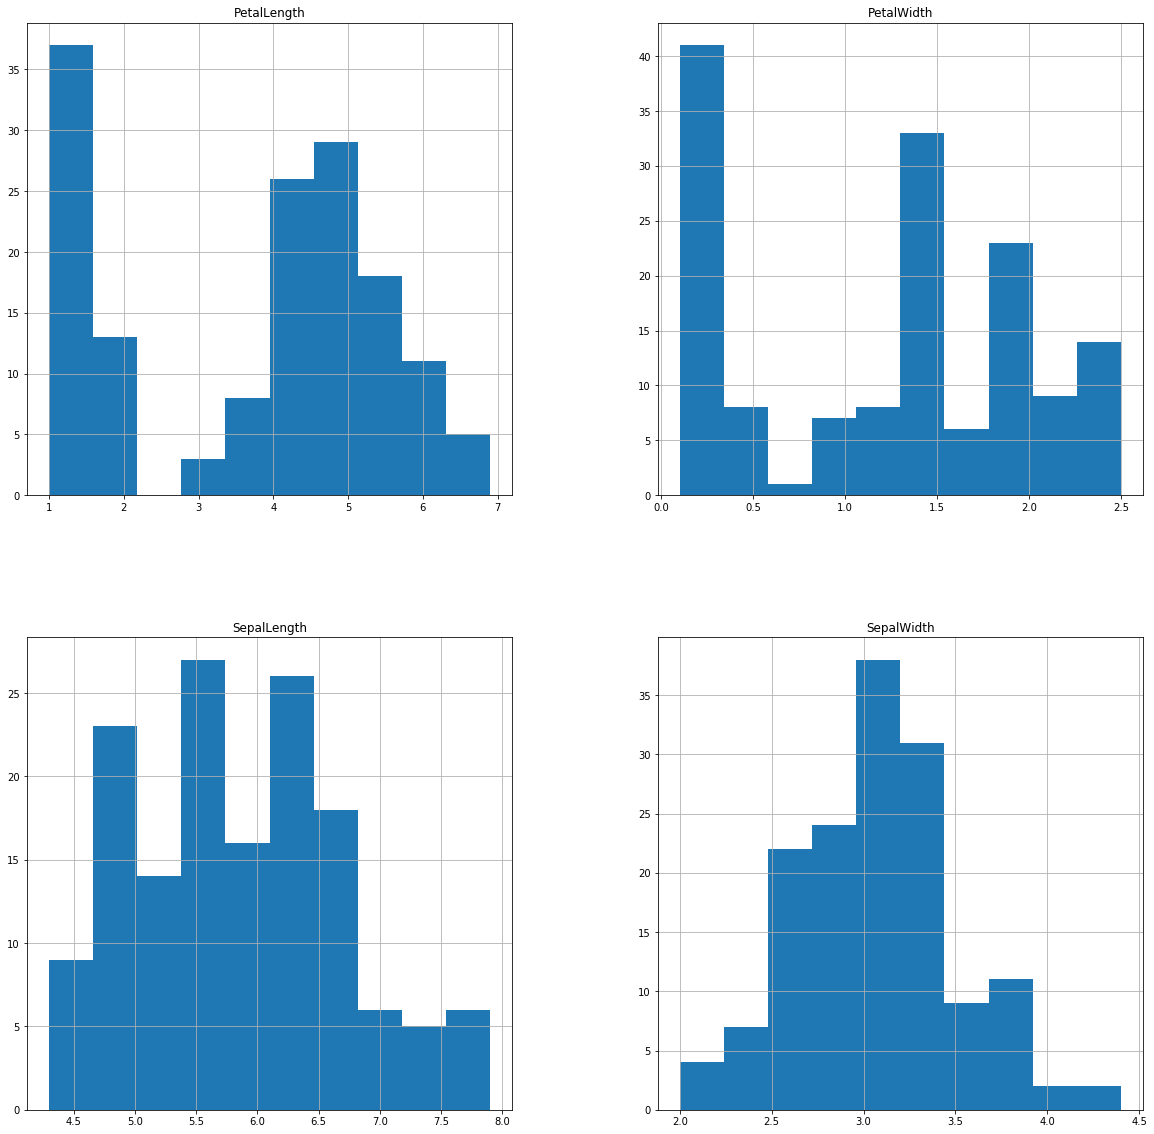

In [597]:
tbl.hist(figsize=(20,20))
print(p)

### 3.2 Computing Simple Statistics

A common DataFrame method is the Describe method use to provide characteristics of the data. 
Use the Describe method to get basic summary statistics like mean, minimum, quartiles etc. for numeric variables on a dataframe and a CASTable.

Run the describe method on a CASTable

In [555]:
#desc = df.describe()

In [556]:
#desc

In [557]:
#type(desc)

Run the describe method on a CASTable

In [558]:
#casdesc = tbl.describe()

In [559]:
#casdesc

In [562]:
#type(casdesc)

swat.dataframe.SASDataFrame

In [561]:
tbl

CASTable('IRIS', caslib='CASUSER(student)')

Percentiles are a useful tool for numeric data exploration. A percentile is a statistical measure indicating 
the value below which a given percentage of observations in a group of observations falls. 
In CAS these statistics are available in the percentile action set.
By default, the percentile action computes the 25th, 50th and 75th percentiles for the selected columns.

In [ ]:
Type the following code into the cell labelled In [ ]: immediately below and then run that cell using the Run menu button
    tbl.describe(percentiles=[.25, .5, .75]). 

In [563]:
#tbl.describe(percentiles=[.25, .5, .75])

Execute the summary action to generate descriptive statistics for all the numeric columns in the Iris table

In [564]:
#tbl.summary()

### 3.3 Data Visualization

Since the tables that come back from the CAS Server are subclasses of Pandas DataFrames, you can do anything to 
them that works on DataFrames.
Use the plot method with default options on the IRIS table.

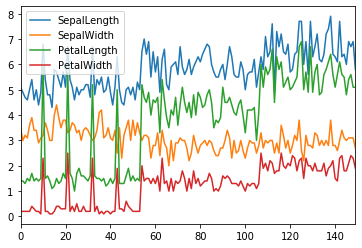

In [500]:
tbl.plot()

### 3.4 Data Manipulation

Its possible for SAS users to manipulate the CAS table using SAS Studio. In the exploration stage we identified that 
there were some sepal widths > 4 cm. We first need to identify the observations. To identify this the head method can be used on a subset of the CAS Table. The following code filters the IRIS CAStable to identify any sepalwidths above 4 cm.

In [609]:
#tbl[tbl['SepalWidth']>4].head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.7,4.4,1.5,0.4,Iris-setosa
1,5.2,4.1,1.5,0.1,Iris-setosa
2,5.5,4.2,1.4,0.2,Iris-setosa


### 3.5 Data Cleansing

After identifying the observation, a decision needs to be made about the outlier. (There are many ways of dealing with outliers
including replacing the value or removing the observation). For this record we will temporarily replace the value of the
reading score to a null value. The replace CAS action is called using the replace method on the CAStable. 
This can be used to replace any value of 4.4 in the data set with the value of nan
which indicates a Python missing value. The inplace option set to True replaces the value
directly in the data set.

Output 9 displays the view within Jupyter after running the replace method

In [601]:
#tbl['SepalWidth'].replace(4.4, pd.np.nan, inplace=True)

CASColumn('IRIS', caslib='CASUSER(student)')['SepalWidth']

Validate that no rows exist with a sepal width of greater than 4 cm

In [ ]:
#tbl[tbl['SepalWidth']>4].head()

Terminate the CAS session

In [605]:
conn.terminate()